In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from BCI2kReader import BCI2kReader as b2k
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image as im

In [2]:
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping # Early Stopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import img_to_array
import easygui

In [3]:
import glob
import os
i = 0
for filename in glob.glob('./dataset/normal/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        my_signals= test.signals
        my_signals = my_signals[:100]
#         normal_dataset = pd.DataFrame(my_signals)
#     fixed_normal_dataset = normal_dataset.merge(normal_dataset, how='right')
    i=i+1
    print('proceed', i )

proceed 1
proceed 2
proceed 3
proceed 4
proceed 5
proceed 6
proceed 7
proceed 8
proceed 9


In [4]:
print(my_signals.shape)

(16, 231144)


In [5]:
data = im.fromarray(my_signals)
if data.mode != 'RGB':
    data = data.convert('RGB')
data.save('gfg_dummy_pic.png')

In [6]:
df1 = pd.DataFrame(my_signals)
mean01 = df1.mean()
mean01.head()

0    7.086751
1    7.383750
2    8.804812
3    9.277125
4    8.602687
dtype: float32

<AxesSubplot:>

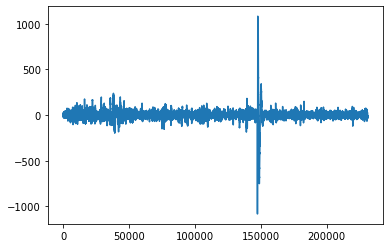

In [7]:
mean01.plot()

In [8]:
dfMean = mean01.describe()


In [9]:
df1 = pd.DataFrame(my_signals)
label = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dfNormal = df1.assign(Labels=label)

In [10]:
dfNormal.index

RangeIndex(start=0, stop=16, step=1)

In [11]:
dfNormal.head()

,0,1,2,3,4,5,6,7,8,9,...,231135,231136,231137,231138,231139,231140,231141,231142,231143,Labels
0,26.598000,24.716999,26.466000,27.323999,26.169001,25.740000,24.552000,20.031,17.193001,21.119999,...,-10.460999,-12.705000,-14.717999,-16.532999,-19.403999,-24.650999,-32.241001,-39.303001,-41.876999,1
1,25.509001,26.499001,27.851999,27.159000,25.971001,26.433001,25.839001,22.473,20.063999,19.569000,...,-13.233000,-18.051001,-22.011000,-21.516001,-19.569000,-20.163000,-22.836000,-24.452999,-23.462999,1
2,25.773001,25.971001,27.489000,26.796000,24.254999,23.000999,21.978001,19.701,18.975000,19.437000,...,-4.785000,-6.897000,-9.537000,-12.045000,-15.147000,-18.282000,-20.493000,-22.836000,-26.004000,1
3,-1.716000,10.791000,21.053999,18.249001,10.395000,9.801000,12.540000,12.342,13.464000,16.632000,...,-5.082000,-7.392000,-9.273000,-8.514000,-6.567000,-5.280000,-3.564000,0.858000,7.755000,1
4,-12.309000,-10.626000,-6.567000,-3.399000,-2.343000,-0.957000,0.231000,1.221,4.554000,7.854000,...,-14.784000,-13.992000,-14.916000,-15.477000,-14.949000,-14.949000,-15.081000,-13.695000,-11.517000,1


In [12]:
for filename2 in glob.glob('./dataset/autism/*.dat'):
    with b2k.BCI2kReader(filename2) as test2:
        my_states2  = test2.read(-1)
        my_signals2 = test2.signals
        my_signals2 = my_signals2[:100]

In [18]:
df2 = pd.DataFrame(my_signals2)
df2 = pd.DataFrame.transpose(df2)
#df2.shape

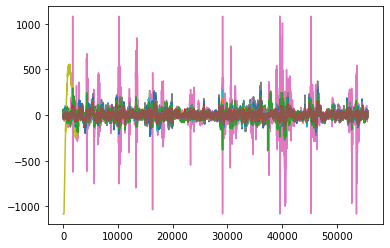

In [19]:
plt.plot(df2)
plt.show()

In [20]:
df2 = pd.DataFrame(my_signals2)
label2 = [0, 0, 0, 0, 0, 0, 0]
dfAutism = df2.assign(Labels=label2)

ValueError: Length of values (7) does not match length of index (16)

In [ ]:
dfAutism.head()

In [ ]:
dataset = pd.merge(dfAutism, dfNormal)

In [ ]:
dataset.head()